In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import cluster

Dataset available at [kaggle mias](https://www.kaggle.com/datasets/kmader/mias-mammography)

In [2]:
img_G = mpimg.imread('data/mdb001.pgm')
img_D = mpimg.imread('data/mdb003.pgm')
img_F = mpimg.imread('data/mdb005.pgm')

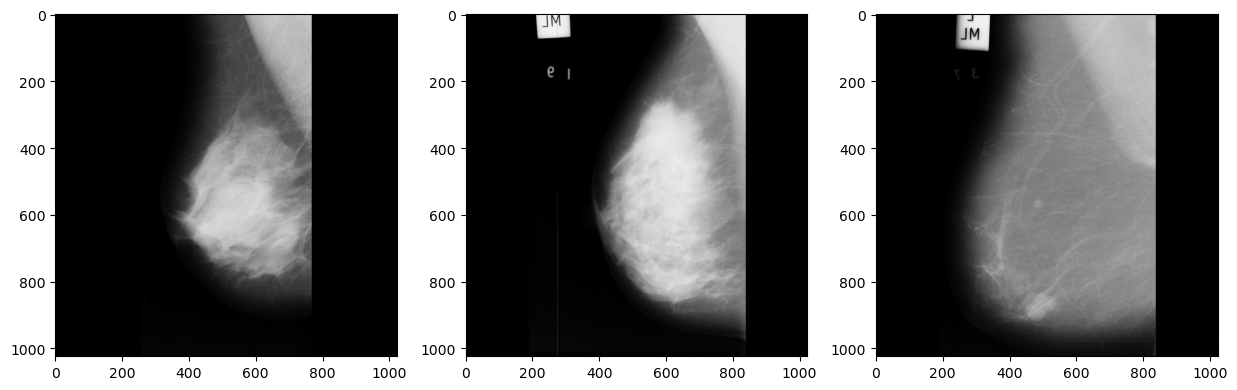

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
im1 = axs[0].imshow(img_G, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F, cmap='gray', vmin=0, vmax=255)
plt.show()

In [4]:
def kmeans_filter(img, n_clusters):
    vectorized = img.reshape((-1, 1))
    model = cluster.KMeans(n_clusters=n_clusters, random_state=0, n_init=5)
    model.fit(vectorized)

    centroids = np.uint8(model.cluster_centers_)
    segmented_data = centroids[model.labels_.flatten()]
    segmented_image = segmented_data.reshape((img.shape))
    return (segmented_image)

In [5]:
clusters = 3

img_G_segmented = kmeans_filter(img_G, clusters)
img_D_segmented = kmeans_filter(img_D, clusters)
img_F_segmented = kmeans_filter(img_F, clusters)

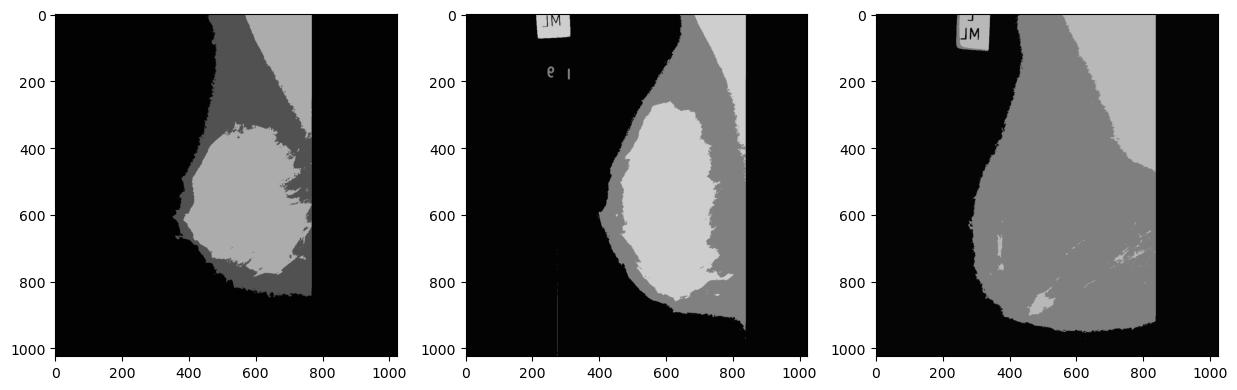

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
im1 = axs[0].imshow(img_G_segmented, cmap='gray', vmin=0, vmax=255)
im2 = axs[1].imshow(img_D_segmented, cmap='gray', vmin=0, vmax=255)
im3 = axs[2].imshow(img_F_segmented, cmap='gray', vmin=0, vmax=255)
plt.show()